## TODO Recording

- Go to https://colab.research.google.com/
- Login and show - create a new notebook
- Change the Runtime type to use T4 GPU
- Go to Google Drive (set up the dataset under MyDrive/emnist_data/)
- Show the dataset under emnist_data/
- Paste the code and execute commands

In [1]:
pip install torch matplotlib numpy pandas

In [2]:
pip install pytorch_lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 10.6 MB/s eta 0:00:00


In [3]:
pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.2 MB/s eta 0:00:00


### ngrok
https://ngrok.com/

https://www.pubnub.com/guides/what-is-ngrok/

In [4]:
pip install pyngrok

## TODO Recording

- Go to https://ngrok.com
- Sign up with an account
- Show the main set up page where there are instructions (for MacOS by default)
- Show where you can access the auth token
- Copy the token


https://stackoverflow.com/questions/61615818/setting-up-mlflow-on-google-colab

In [ ]:
# run tracking UI in the background
get_ipython().system_raw("mlflow ui --port 5000 &") # run tracking UI in the background


# create remote tunnel using ngrok.com to allow local port access
from pyngrok import ngrok

# Terminate open tunnels if they exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "2XG0VEXnjoKsOuNEFzy7pOwf7mM_6Ug1nZkTBJF63W3rCtgjH"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr = "5000", proto = "http", bind_tls = True)

print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://a780-34-123-64-17.ngrok-free.app


### TODO Recording:

- Click on the tracking URL
- Show the Experiments page
- Click on the drop downs on this page
- Click on Models and show the models page

In [5]:
import mlflow
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader

Link of dataset-
https://www.kaggle.com/datasets/crawford/emnist/data?select=emnist-letters-train.csv
https://www.kaggle.com/datasets/crawford/emnist/data?select=emnist-letters-test.csv   

In [6]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


### TODO Recording:
- Open up the folder on the left sidebar
- Show the Drive folder mounted here
- Make sure you close the left sidebar



In [7]:
emnist_train_data  = pd.read_csv("/content/drive/MyDrive/emnist_data/emnist-letters-train.csv")
emnist_test_data = pd.read_csv("/content/drive/MyDrive/emnist_data/emnist-letters-test.csv")

emnist_train_data.head(10)

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
emnist_test_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


It is clear that pixel values are not normalised and also minimum label value is 1 so we have to make the starting label as 0 by subtraction by 1

In [ ]:
emnist_train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,88800.000000,88800.0,88800.0,88800.0,88800.000000,88800.000000,88800.000000,88800.000000,88800.000000,88800.000000,...,88800.0,88800.0,88800.0,88800.000000,88800.000000,88800.0,88800.0,88800.0,88800.0,88800.0
mean,13.519268,0.0,0.0,0.0,0.000011,0.003986,0.016757,0.024640,0.021486,0.017140,...,0.0,0.0,0.0,0.003041,0.000360,0.0,0.0,0.0,0.0,0.0
std,7.502931,0.0,0.0,0.0,0.003356,0.544039,1.547686,1.915976,1.803270,1.620194,...,0.0,0.0,0.0,0.823445,0.107385,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,7.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,14.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,20.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,26.000000,0.0,0.0,0.0,1.000000,107.000000,213.000000,217.000000,214.000000,216.000000,...,0.0,0.0,0.0,244.000000,32.000000,0.0,0.0,0.0,0.0,0.0


Randomizing rows for test data so that different classes are coming in each batch

In [ ]:
emnist_test_data = emnist_test_data.sample(frac = 1)

emnist_test_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
5451,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6846,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13917,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13707,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10180,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13217,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1414,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13748,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3079,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9882,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
classes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
           'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

Visualising a few training images. Label is subtracted by 1 to start the numbering from 0

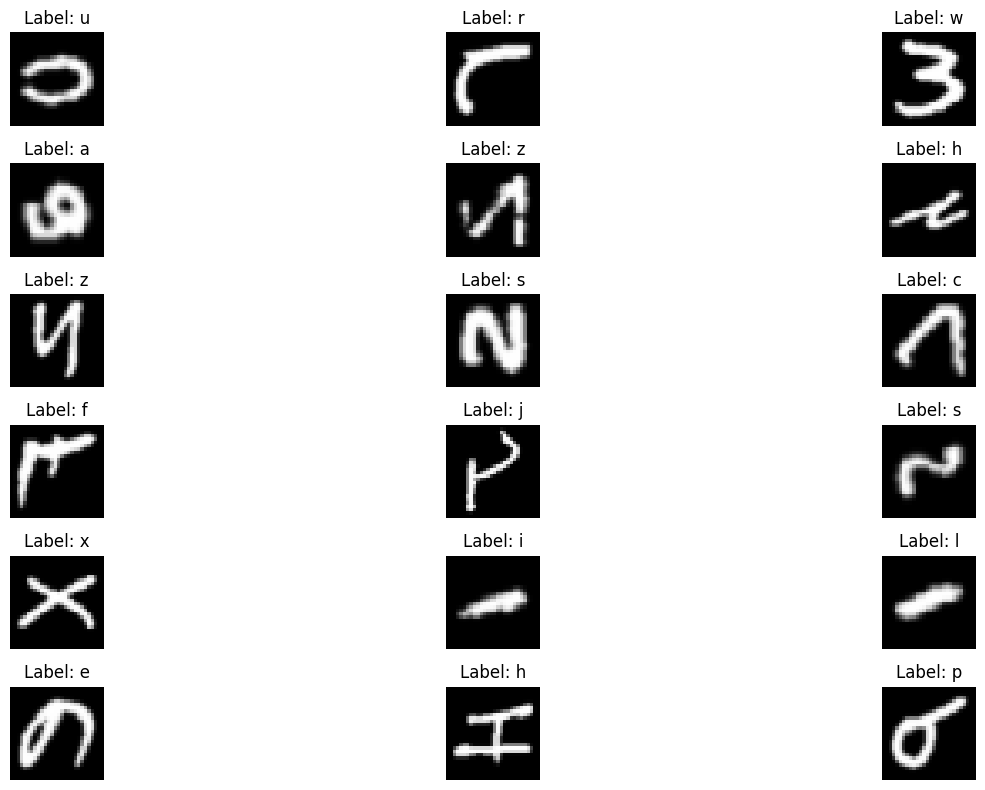

In [ ]:
# Assuming the first column contains labels and the rest are pixel values
train_labels = emnist_train_data.values[:, 0]
train_images = emnist_train_data.values[:, 1:]

# Reshape the images to (num_samples, 28, 28)
train_images = train_images.reshape(-1, 28, 28)

# Display a few random images
num_samples = 18

random_indices = np.random.randint(0, len(train_images), num_samples)

random_indices

fig = plt.figure(figsize = (16, 8))

for i, idx in enumerate(random_indices):
    plt.subplot(6, int(num_samples / 6), i+1)
    plt.imshow(train_images[idx] / 255.0, cmap = "gray")
    plt.title(f"Label: {classes[int(train_labels[idx] - 1)]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Let's create and MLflow experiment and see how it works

In [ ]:
experiment_id = mlflow.create_experiment(name = 'test_experiment')

experiment_id

'776385442744987609'

### TODO Recording

- Open the MLflow page
- Show that the experiment has been created
- Select the test experiment and show nothing there
- Click on the test experiment, nothing there
- Click on the sidebar on the left - show the mlruns/ folder
- expand all the sub-folders inside mlruns/

In [ ]:
experiment = mlflow.get_experiment(experiment_id)

print("Name: {}".format(experiment.name))
print("Experiment_id: {}".format(experiment.experiment_id))
print("Artifact Location: {}".format(experiment.artifact_location))
print("Tags: {}".format(experiment.tags))
print("Lifecycle_stage: {}".format(experiment.lifecycle_stage))
print("Creation timestamp: {}".format(experiment.creation_time))

Name: test_experiment
Experiment_id: 776385442744987609
Artifact Location: file:///content/mlruns/776385442744987609
Tags: {}
Lifecycle_stage: active
Creation timestamp: 1702035696355


In [ ]:
mlflow.set_experiment(experiment_name = 'test_experiment')

<Experiment: artifact_location='file:///content/mlruns/776385442744987609', creation_time=1702035696355, experiment_id='776385442744987609', last_update_time=1702035696355, lifecycle_stage='active', name='test_experiment', tags={}>

In [ ]:
mlflow.start_run()

mlflow.end_run()

### TODO Recording:

- Go to the MLflow UI
- Show the run under test_experiment
- Click through and show the run is empty
- Open up the left sidebar
- Under mlruns/ show the folder with run_id
- Expand that and show folders for artifacts, metrics etc

In [ ]:
data_info = """
  The EMNIST dataset is a set of handwritten character digits derived
  from the NIST Special Database 19  and converted to a 28x28 pixel image format and dataset
  structure that directly matches the MNIST dataset.
  Further information on the dataset contents and conversion process can be found in
  the paper available at https://arxiv.org/abs/1702.05373v1.
"""

with open("data_info.txt", "w") as f:
    f.write(data_info)

In [ ]:
with mlflow.start_run(run_name = 'test_experiment_run') as current_run:

    mlflow.log_metric('Accuracy', 0.67)

    params = {
        'num_nn_layers': 4
    }
    mlflow.log_params(params)

    mlflow.log_figure(fig, 'sample_images.png')

    mlflow.log_artifact("data_info.txt")

    mlflow.set_tag('EMNIST', 'Classification using DNNs')

### TODO Recording:

- Go to the MLflow UI
- Show that we now have another run test_experiment_run
- Click through and show everything logged
- Please make sure to expand and show everything

First column is label and rest are pixel values in 28*28=784 columns. Pixel values are normalised by dividing with 255

In [ ]:
class EMNISTDataset(Dataset):
    def __init__(self, dataframe):

        self.images = torch.tensor(dataframe.iloc[:, 1:].values, dtype= torch.float32)

        self.labels = torch.tensor(dataframe.iloc[:, 0].values, dtype = torch.float32)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        images = self.images[idx]

        images = images / 255.0
        labels = self.labels[idx]

        return images, labels

Instantiating the custom datasets and checking the corresponding dimensions

In [ ]:
train_dataset = EMNISTDataset(emnist_train_data)

test_dataset = EMNISTDataset(emnist_test_data )

len(train_dataset), len(test_dataset)

(88800, 14800)

Splitting train dataset into training and validation sets

In [ ]:
from torch.utils.data import random_split

val_percent = 0.1
val_len = int(val_percent * len(train_dataset))

train_ds, val_ds = random_split(train_dataset, [len(train_dataset) - val_len, val_len])

print(len(train_ds), len(val_ds))

79920 8880


Creating Training, validation and testing dataloaders from corresponding datasets with batch size of 64 and shuffling enabled for training dataloader.Note:drop_last is enabled for training loader to avoid unequal batch size in last step.

In [ ]:
batch_size = 64

train_dataloader = DataLoader(train_ds, batch_size, shuffle = True, drop_last = True, num_workers=1)

val_dataloader = DataLoader(val_ds, batch_size, num_workers=1)

test_dataloader = DataLoader(test_dataset, batch_size, num_workers=1)

len(train_dataloader ), len(val_dataloader ), len(test_dataloader )

(1248, 139, 232)

In [ ]:
dataiter = iter(train_dataloader)
batch_images, batch_labels = next(dataiter)

batch_images

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
batch_labels

tensor([12., 24., 13.,  7.,  9., 24., 18., 11., 12., 16., 17., 17., 26.,  4.,
        22., 20.,  6., 22., 17.,  8., 13.,  3.,  7., 23., 19., 24., 26.,  7.,
        23., 14., 24., 13.,  5.,  1., 15., 17., 19., 23.,  6., 26., 20., 11.,
        16.,  6.,  7., 16., 14.,  2.,  8., 24.,  2., 24., 18., 16., 25.,  3.,
         2.,  3., 13., 25., 23.,  2., 26., 10.])

In [ ]:
batch_images.shape, len(batch_labels)

(torch.Size([64, 784]), 64)

Creating MLflow experiment for tracking and logging parameters

In [ ]:
import mlflow

experiment_id = mlflow.create_experiment(name = "emnist_letters_prediction_using_dnn")

mlflow.set_experiment(experiment_name = "emnist_letters_prediction_using_dnn")

<Experiment: artifact_location='file:///content/mlruns/721128539992845815', creation_time=1702038371011, experiment_id='721128539992845815', last_update_time=1702038371011, lifecycle_stage='active', name='emnist_letters_prediction_using_dnn', tags={}>

All libraries for model training are imported

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pytorch_lightning as pl

from torchmetrics.functional import accuracy

Model input and output parameters are defined

In [ ]:
input_size = 28 * 28

output_size = 26

Defining Lightning Module for Letter classification. Model is DNN and metrics are logged using log method of lightning

In [ ]:
class EmnistModel(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.criterion = nn.CrossEntropyLoss()

        self.linear1 = nn.Linear(input_size, 512)
        self.linear2 = nn.Linear(512, 128)
        self.linear3 = nn.Linear(128, 32)
        self.linear4 = nn.Linear(32, output_size)

    def forward(self, xb):
        out = self.linear1(xb)
        out = F.relu(out)

        out = self.linear2(out)
        out = F.relu(out)

        out = self.linear3(out)
        out = F.relu(out)

        out = self.linear4(out)
        return out

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr = 0.0001)

    def training_step(self, batch, batch_idx):
        x, y = batch
        y -= 1

        y_hat = self(x)
        loss = self.criterion(y_hat, y.long())
        pred = y_hat.argmax(dim = 1)

        acc = accuracy(pred, y, task = "multiclass", num_classes = 26)

        self.log("train_loss", loss, on_epoch = True, prog_bar = True)
        self.log("train_acc", acc, on_epoch = True, prog_bar = True)

        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y -= 1

        y_hat = self(x)
        loss = self.criterion(y_hat, y.long())
        pred = y_hat.argmax(dim = 1)

        acc = accuracy(pred, y, task = "multiclass", num_classes = 26)

        self.log("valid_loss", loss, on_epoch = True, prog_bar = True)
        self.log("valid_acc", acc, on_epoch = True, prog_bar = True)

        return acc

    def test_step(self, batch, batch_idx):
        x, y = batch
        y -= 1

        y_hat = self(x)
        loss = self.criterion(y_hat, y.long())
        pred = y_hat.argmax(dim = 1)

        acc = accuracy(pred, y, task = "multiclass", num_classes = 26)

        self.log("test_loss", loss, logger = True)
        self.log("test_acc", acc, logger = True)

        return acc


    def predict_step(self, batch, batch_idx, dataloader_idx = 0):
        x, y = batch

        return self(x)

Model Training is done  with Trainer and All parameters are autologged using mlflow autologging and Trained Model is logged separately with defined Signature with input and output schema. Model metrics are also separately logged using CSV logger. Training is done for 10 epochs and then Model is tested on Test dataloader

In [ ]:
from mlflow.models.signature import ModelSignature
from mlflow.types.schema import ColSpec, Schema, TensorSpec
from pytorch_lightning.loggers import CSVLogger

emnist_model = EmnistModel()

logger = CSVLogger("logs", name = "emnist_letters_classification")

trainer = pl.Trainer(max_epochs = 10, logger = logger)

mlflow.pytorch.autolog(log_models = False)

with mlflow.start_run() as run:

    trainer.fit(emnist_model, train_dataloader, val_dataloader)
    trainer.test(dataloaders = test_dataloader)

    input_schema = Schema([TensorSpec(np.dtype(np.float32), (-1, 784))])
    output_schema = Schema([TensorSpec(np.dtype(np.float32), (-1, 26))])

    signature = ModelSignature(inputs = input_schema, outputs = output_schema)

    mlflow.pytorch.log_model(emnist_model, "emnist-letters-classifier-dnn-model", signature = signature)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type             | Params
-----------------------------------------------
0 | criterion | CrossEntropyLoss | 0     
1 | linear1   | Linear           | 401 K 
2 | linear2   | Linear           | 65.7 K
3 | linear3   | Linear           | 4.1 K 
4 | linear4   | Linear           | 858   
-----------------------------------------------
472 K     Trainable params
0         Non-trainable params
472 K     Total params
1.890     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at logs/emnist_letters_classification/version_1/checkpoints/epoch=9-step=12480.ckpt
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from the checkpoint at logs/emnist_letters_classification/version_1/checkpoints/epoch=9-step=12480.ckpt
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8470270037651062     │
│         test_loss         │     0.488701194524765     │
└───────────────────────────┴───────────────────────────┘

2023/12/08 12:35:21 WARNING mlflow.utils.requirements_utils: Found torch version (2.1.0+cu118) contains a local version label (+cu118). MLflow logged a pip requirement for this package as 'torch==2.1.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2023/12/08 12:35:27 WARNING mlflow.utils.requirements_utils: Found torchvision version (0.16.0+cu118) contains a local version label (+cu118). MLflow logged a pip requirement for this package as 'torchvision==0.16.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2023/12/08 12:35:27 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.4.20+cuda11.cudnn86) contains a local version label (+cuda11.cudnn86). MLflow logged a pip requirement for this package as 'jaxlib==0.4.20' without t

### TODO Recording

- Go to the MLflow UI
- Show the new run
- IMPORTANT: Show the charts in the chart tab
- Click through to the run
- Show everything logged
- Click on each artifact under MLmodel

In [ ]:
metrics = pd.read_csv(f"{trainer.logger.log_dir}/metrics.csv")

metrics

,step,train_acc_step,epoch,train_loss_step,valid_acc,valid_loss,train_loss_epoch,train_acc_epoch,test_loss,test_acc
0,49,0.109375,0,3.213628,NaN,NaN,NaN,NaN,NaN,NaN
1,99,0.187500,0,3.094886,NaN,NaN,NaN,NaN,NaN,NaN
2,149,0.406250,0,2.760282,NaN,NaN,NaN,NaN,NaN,NaN
3,199,0.281250,0,2.561630,NaN,NaN,NaN,NaN,NaN,NaN
4,249,0.375000,0,2.327724,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
265,12399,0.828125,9,0.564090,NaN,NaN,NaN,NaN,NaN,NaN
266,12449,0.937500,9,0.285329,NaN,NaN,NaN,NaN,NaN,NaN
267,12479,NaN,9,NaN,0.868919,0.43167,NaN,NaN,NaN,NaN
268,12479,NaN,9,NaN,NaN,NaN,0.40878,0.87634,NaN,NaN


Accuracy and Loss are plotted wrt epochs

<Axes: xlabel='epoch'>

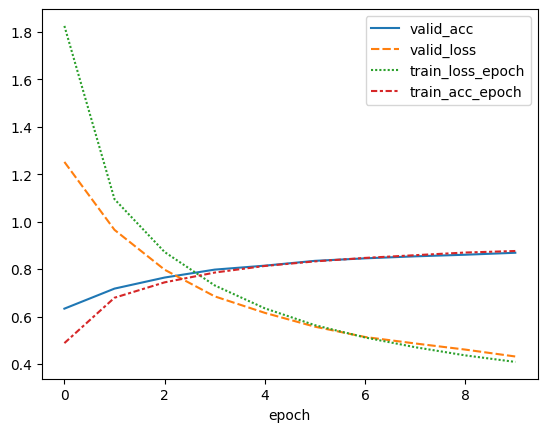

In [ ]:
import seaborn as sns

# Set the epoch column as the index, for easier plotting
metrics.set_index("epoch", inplace = True)
metrics.drop(columns = ['step', 'train_loss_step',
                        'train_acc_step', 'test_acc', 'test_loss'], inplace = True)
# Create a line plot of the training metrics using Seaborn
sns.lineplot(data = metrics)

Obtaining last active run id

In [ ]:
run_id = mlflow.last_active_run().info.run_id

run_id

'28730c4842ed4841b50d52872163af6e'

Batch of test images are loaded

In [ ]:
test_dataiter = iter(test_dataloader)

test_imgs, test_labels = next(test_dataiter)

test_imgs.shape, test_labels.shape

(torch.Size([64, 784]), torch.Size([64]))

Predictions are obtained which are logits

In [ ]:
logged_model = f"runs:/{run_id}/emnist-letters-classifier-dnn-model"

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

predictions = loaded_model.predict(test_imgs.numpy())

predictions[:5]

array([[ -4.326235  ,  -1.195148  , -12.00125   ,  -4.6102505 ,
         -6.032143  ,  -7.7581162 ,   0.57997864,  -3.7994587 ,
        -12.140143  ,  -9.833375  , -10.459487  , -15.757298  ,
         -9.260659  ,  -8.919298  ,  -5.325369  ,  -7.4969254 ,
         -0.8505091 ,  -8.233835  ,  -1.6076342 ,  -9.919879  ,
         -8.961699  ,  -6.8919735 , -10.266281  ,  -5.1947803 ,
         -3.0954094 ,  -7.8063655 ],
       [ -8.196665  ,  -5.0144205 ,  -2.3489733 ,  -0.34468645,
         -3.7018757 ,  -2.7837768 ,  -7.654131  ,  -1.6443942 ,
          8.471101  ,   0.04824504,  -0.9208611 ,   6.3561215 ,
        -12.032291  ,  -6.766908  ,  -6.7887654 ,  -6.889983  ,
         -7.352852  ,  -2.1354003 ,  -5.8250065 ,   1.5926983 ,
         -3.4300685 ,   1.3074892 ,  -4.3304462 ,   0.9010837 ,
         -2.3371978 ,  -1.1202681 ],
       [ -5.2171707 ,  -4.5566688 ,   2.3116271 ,  -4.0708475 ,
          0.03943152,   2.7386765 ,  -4.262039  ,  -4.3494754 ,
         -2.3711035 ,  -2.5413

Actual label is checked and note that for obtaining class we need to subtract label value by 1

In [ ]:
test_labels[6].item()

2.0

In [ ]:
classes[int(test_labels[6].item()) - 1]

'b'

predicted label is checked which is same as actual label

In [ ]:
predictions[6]

array([ -1.9387822 ,   8.90093   ,  -4.807266  ,   4.0304546 ,
        -2.4910154 ,  -3.9679432 ,  -1.8425076 ,   4.806289  ,
        -1.403641  ,  -2.1481755 ,  -3.625736  ,  -1.0774903 ,
       -14.9475565 ,  -6.9781594 ,  -8.534465  , -13.239978  ,
        -6.1841774 ,  -7.1364923 ,  -0.966203  ,   0.18396129,
        -9.211511  ,  -9.466343  ,  -9.059906  ,  -3.6319754 ,
       -10.666968  ,  -3.5270011 ], dtype=float32)

In [ ]:
classes[np.argmax(predictions[6])]

'b'

Defining a function for displaying predicted and actual labels for a batch of images

In [ ]:
def show(idx, title):

    plt.figure()
    plt.imshow(test_imgs[idx].numpy().reshape(28, 28), cmap = "gray")

    plt.axis("off")
    plt.title("\n\n{}".format(title), fontdict = {"size": 16})

We can observe a batch of images for comparing its predicted label with actual label

<ipython-input-69-de63a52b775e>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


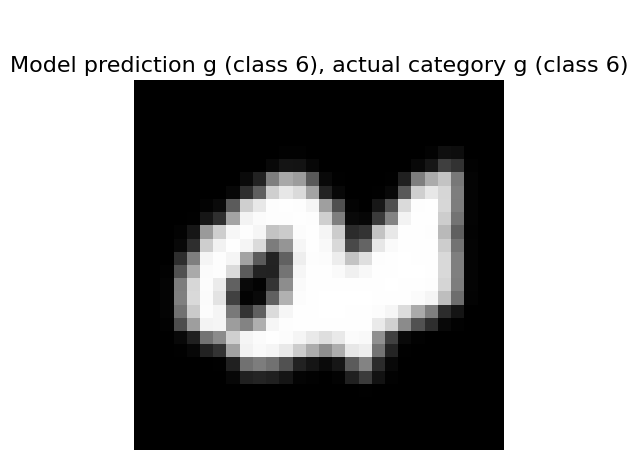

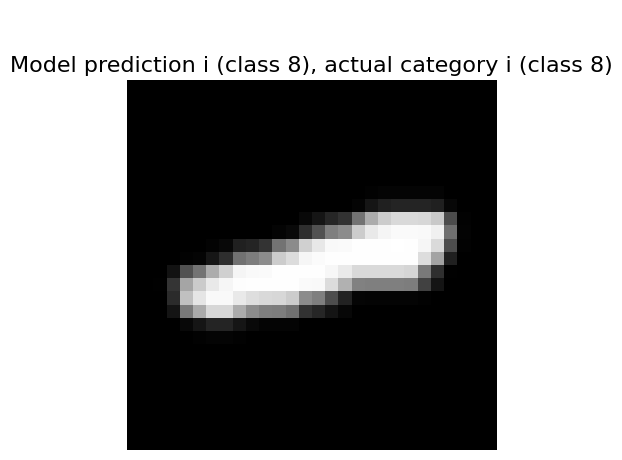

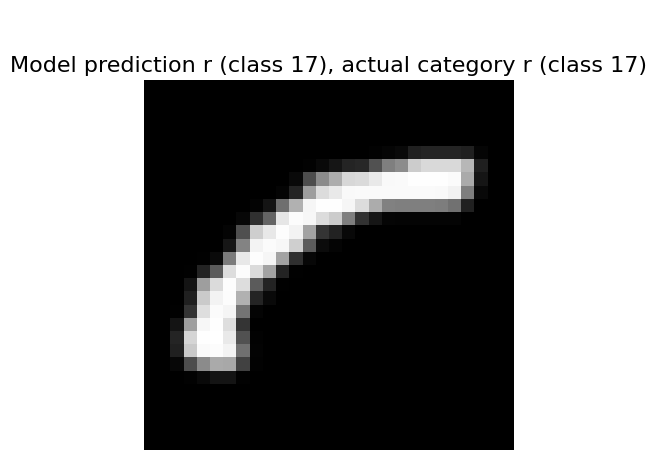

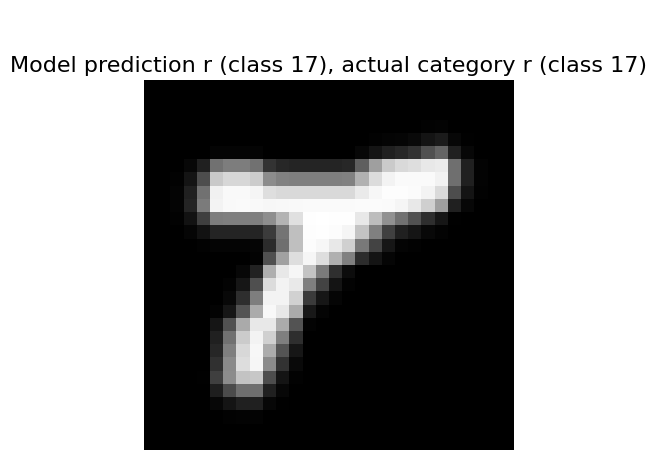

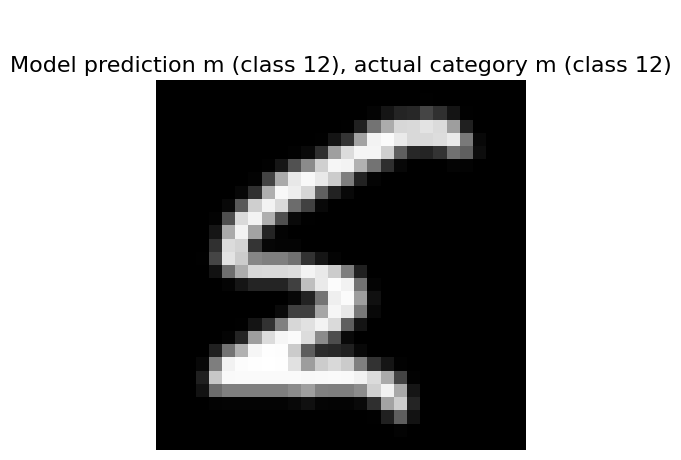

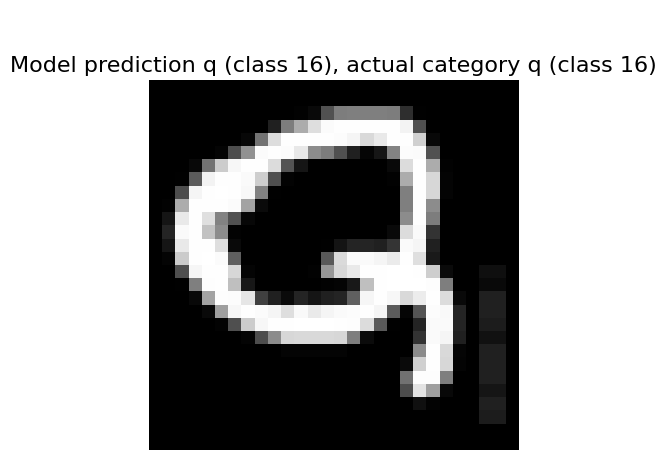

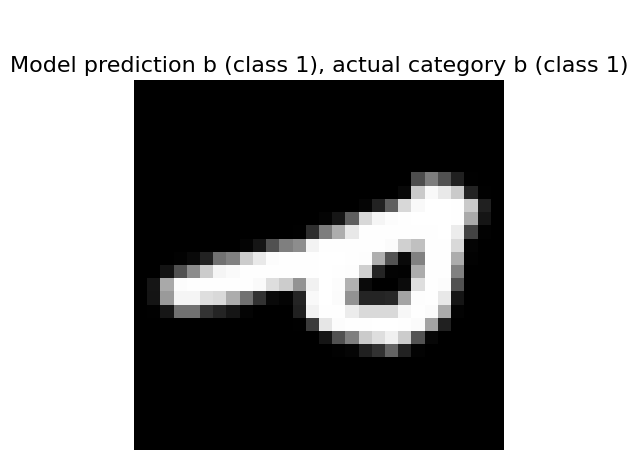

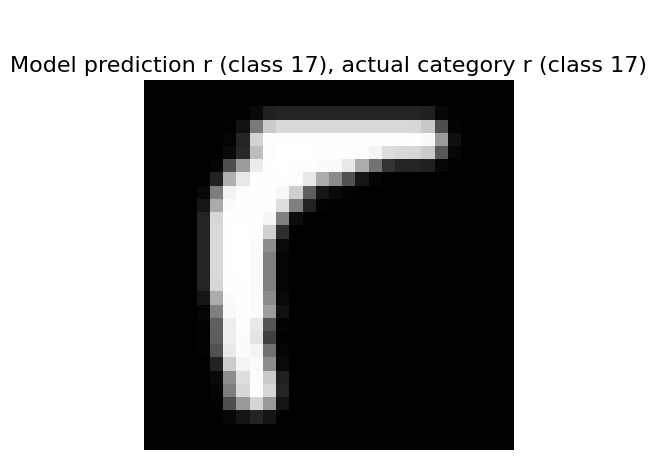

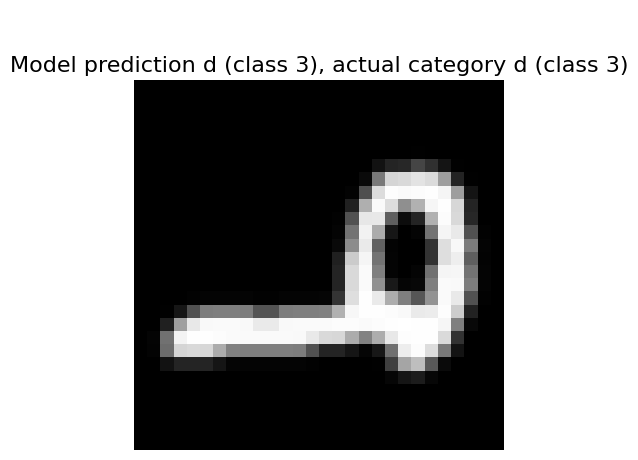

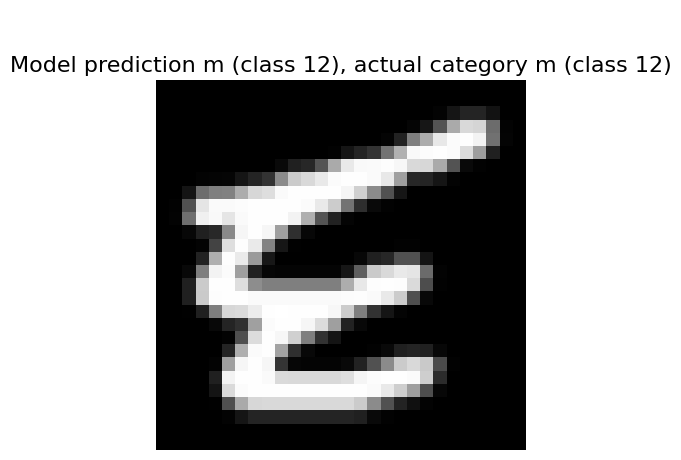

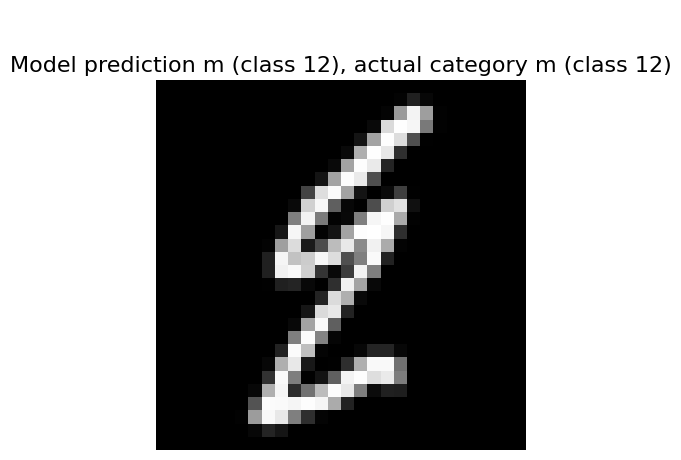

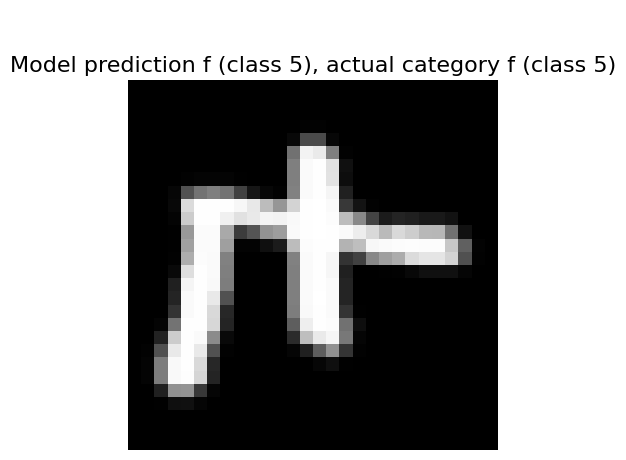

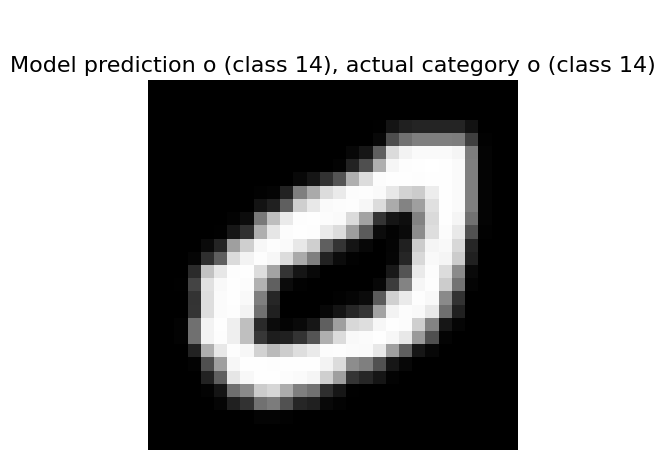

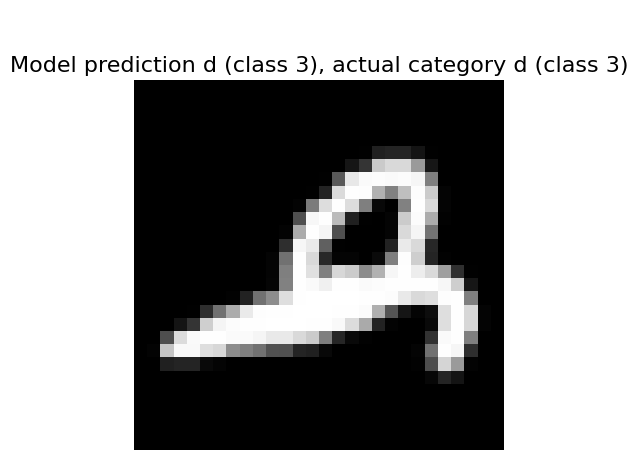

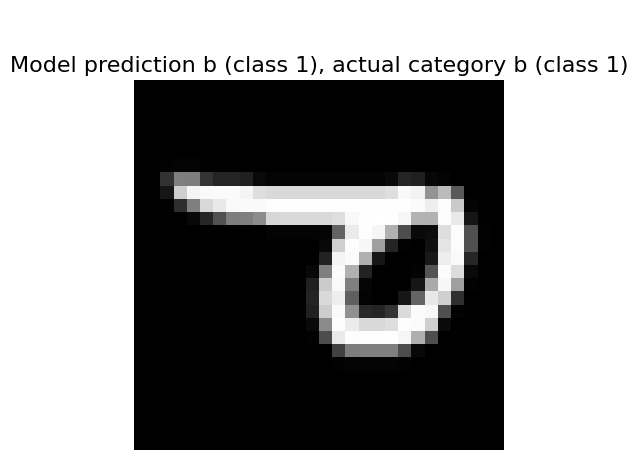

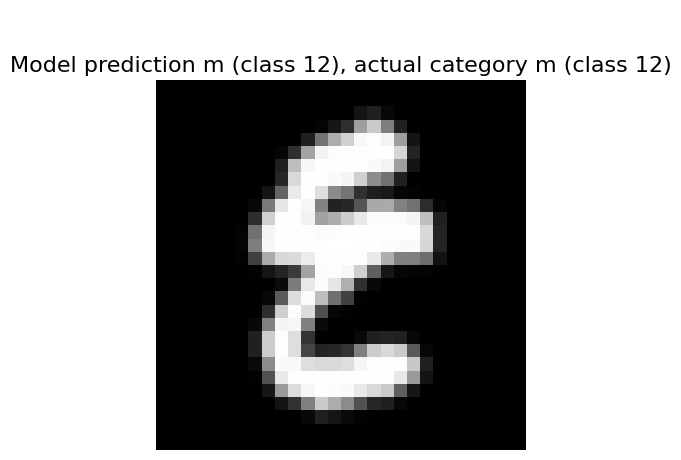

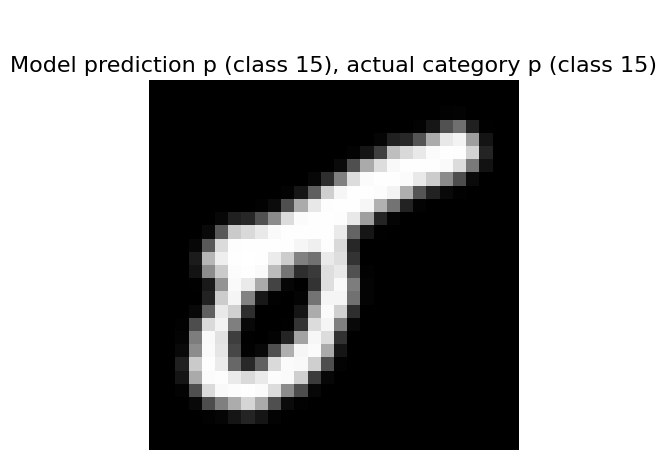

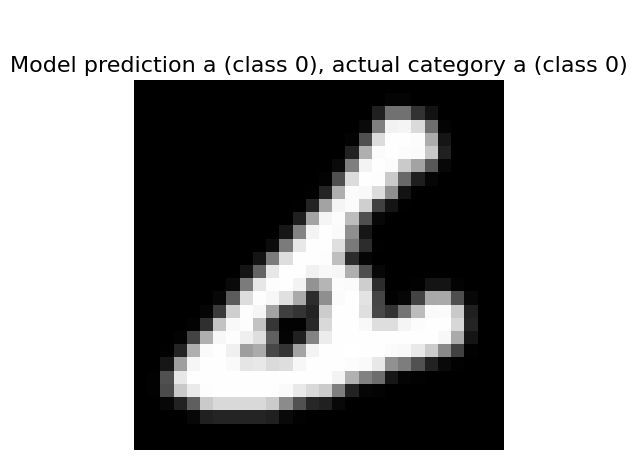

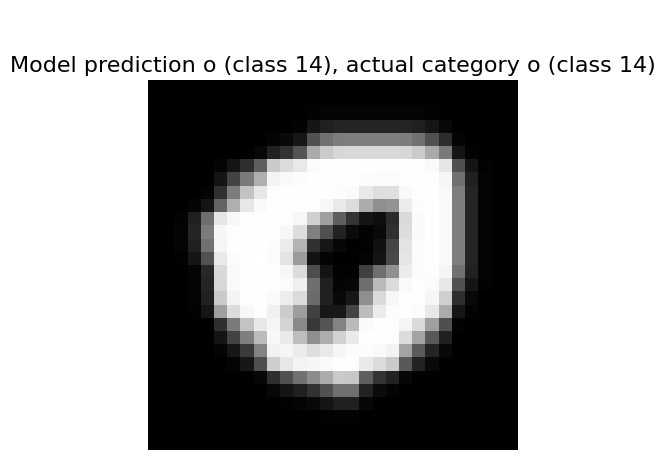

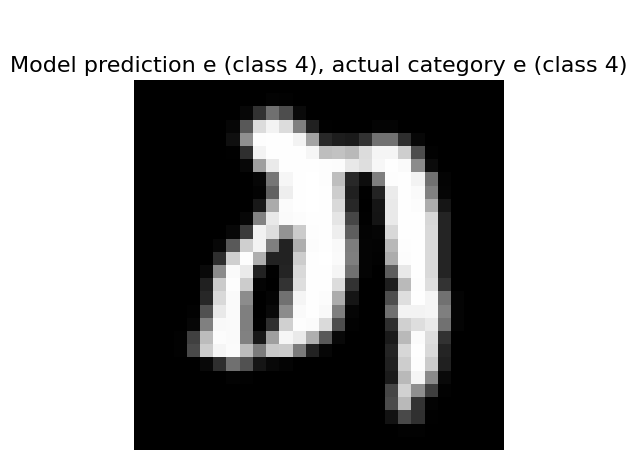

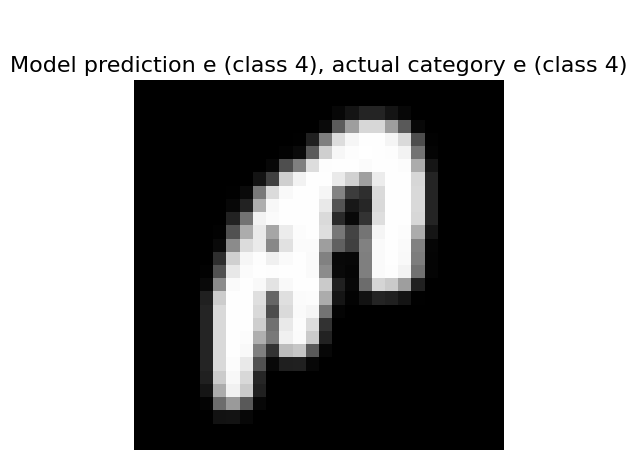

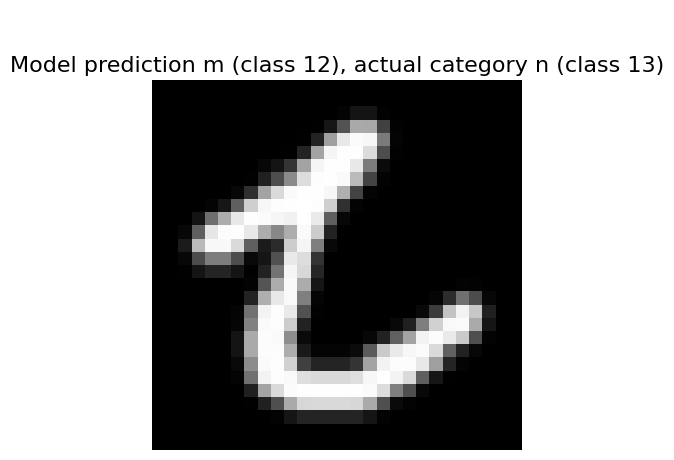

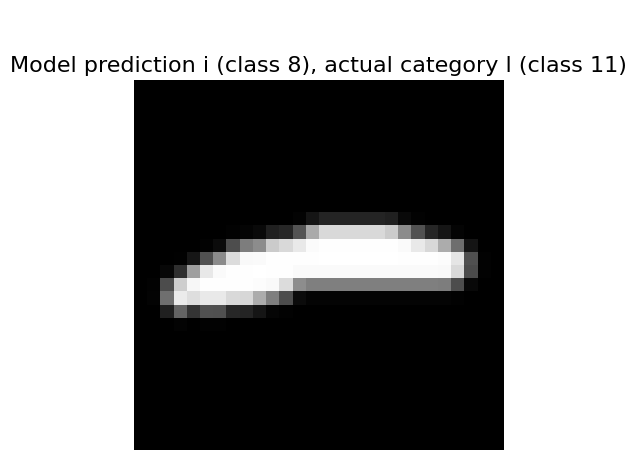

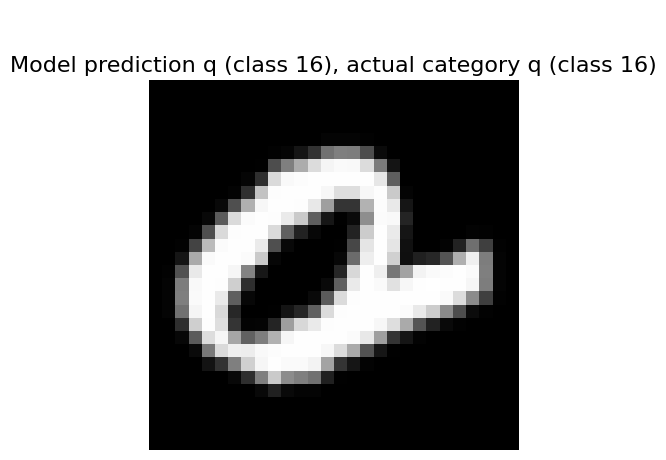

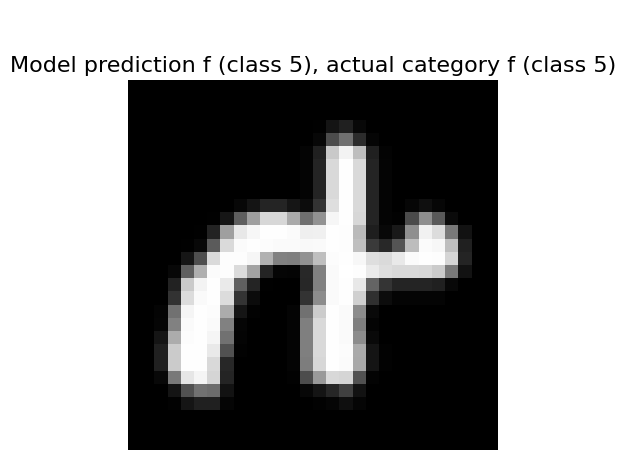

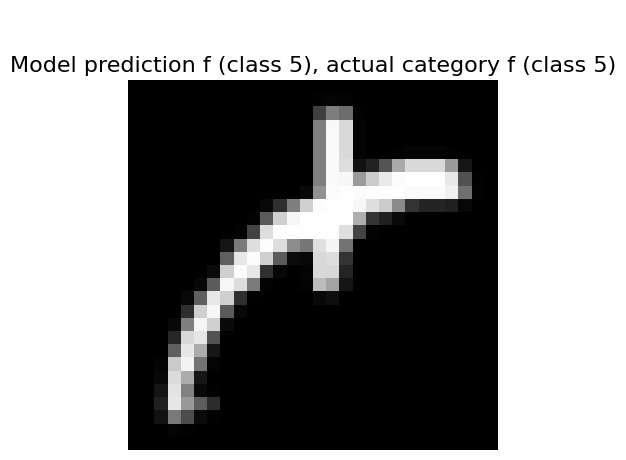

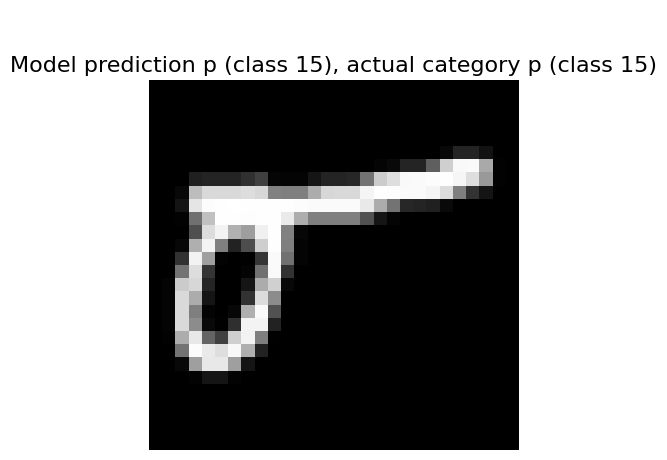

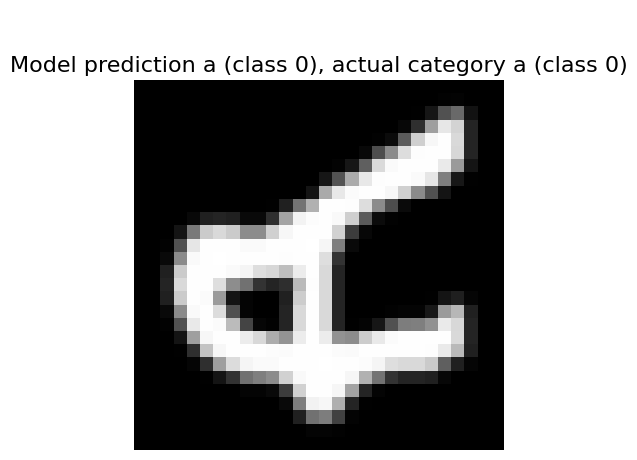

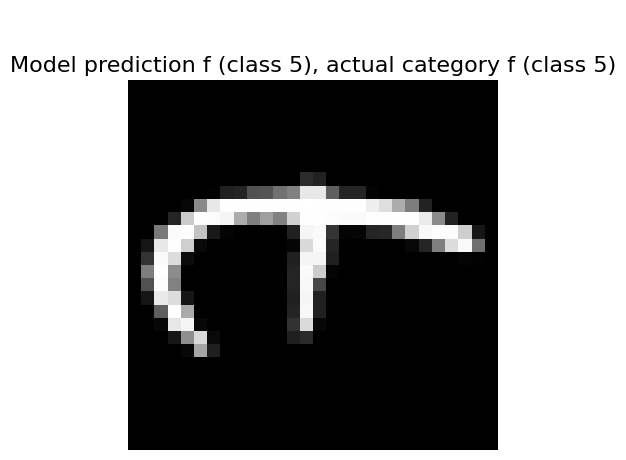

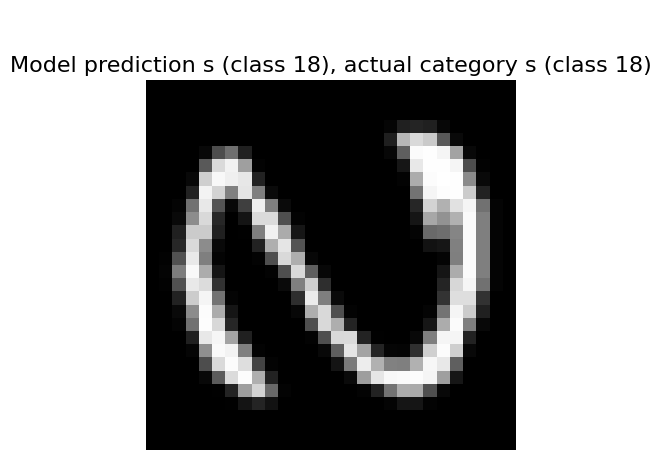

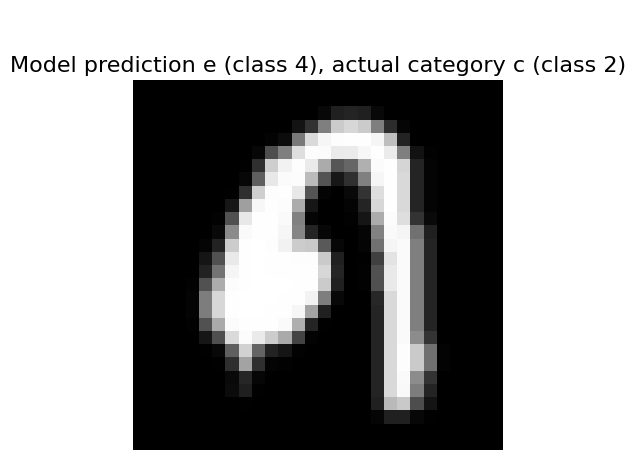

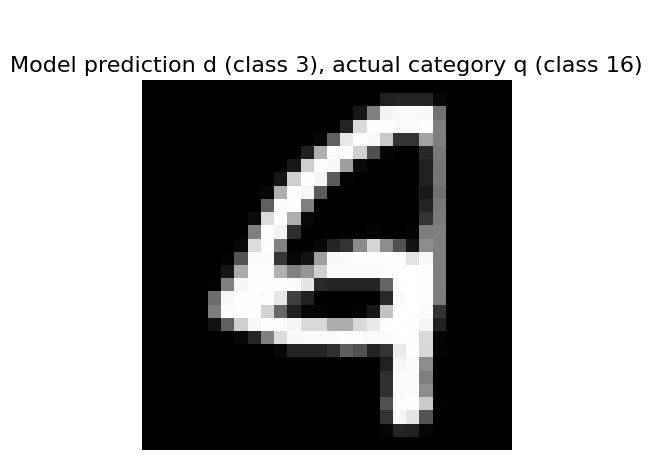

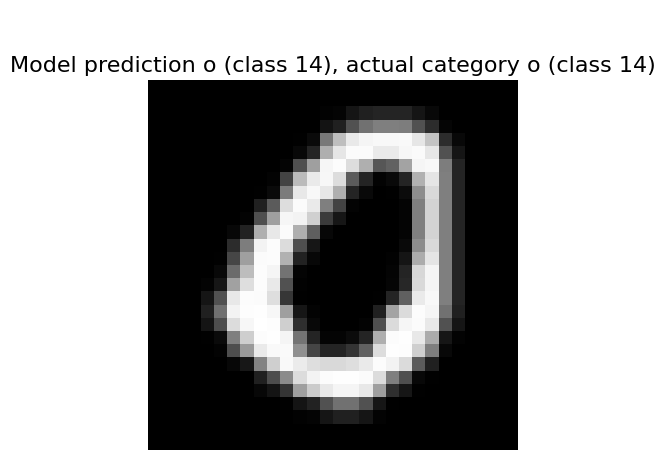

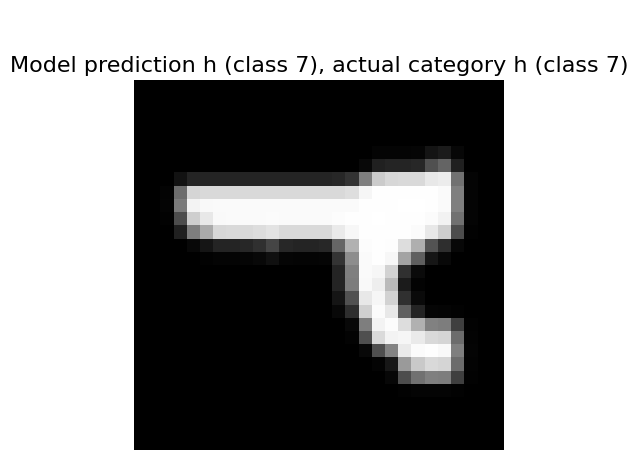

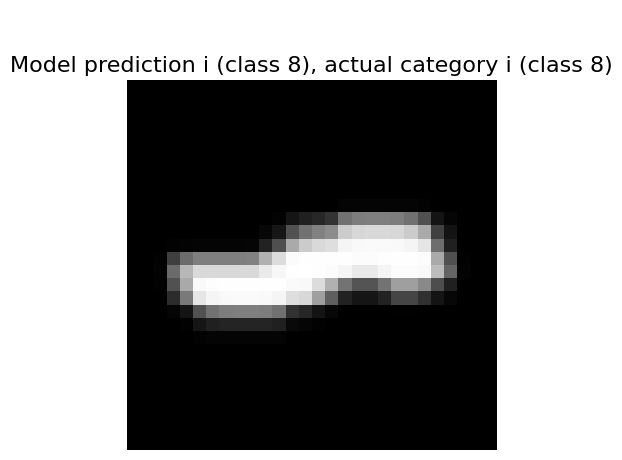

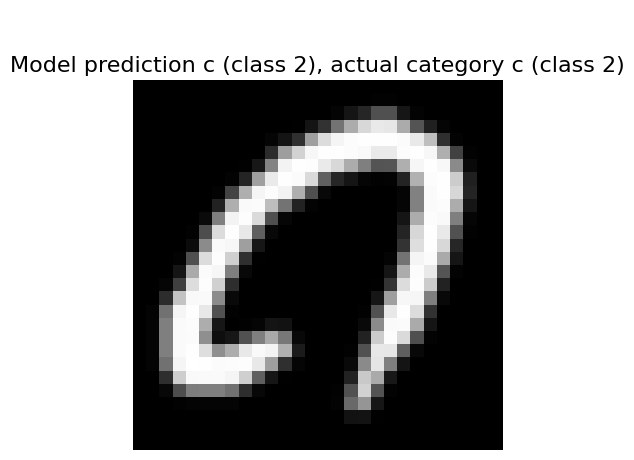

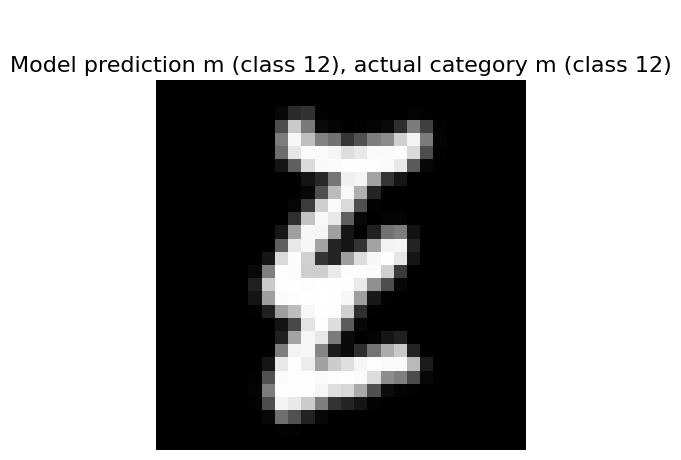

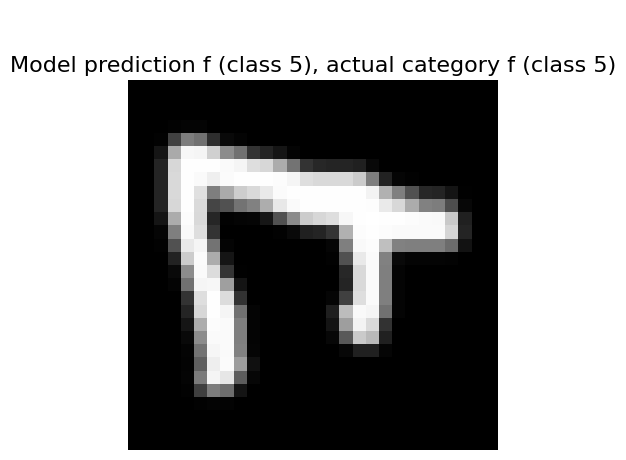

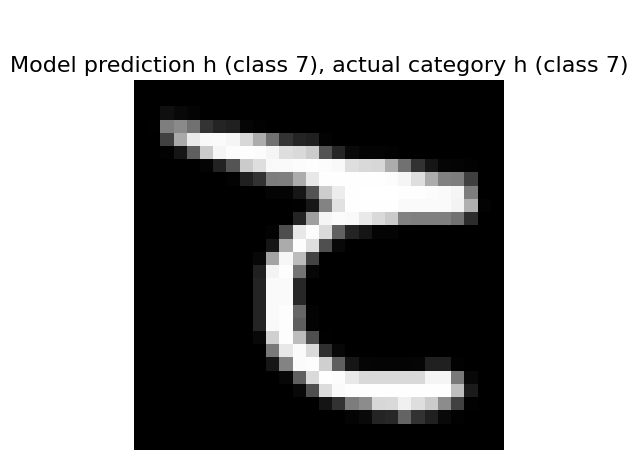

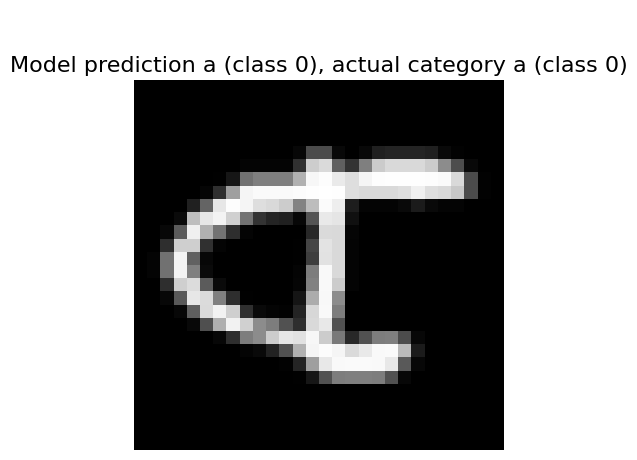

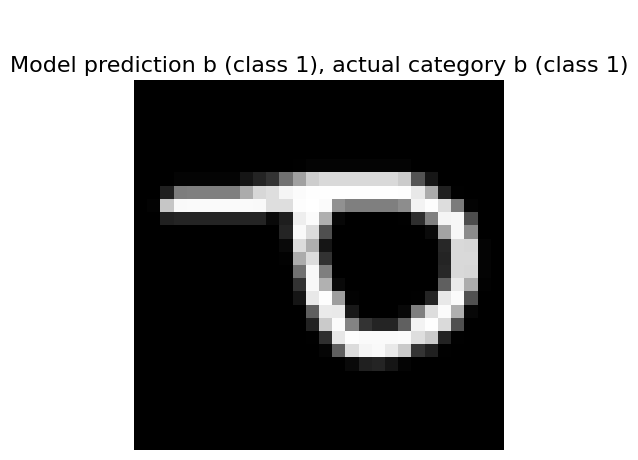

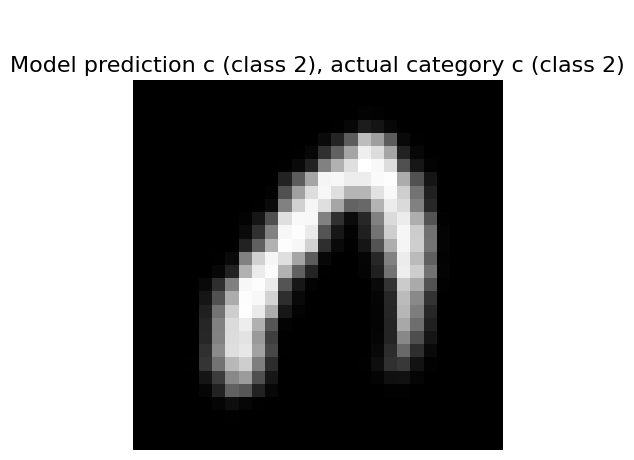

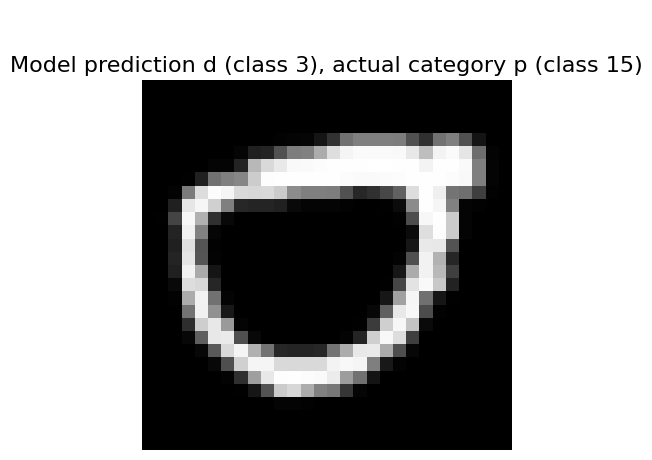

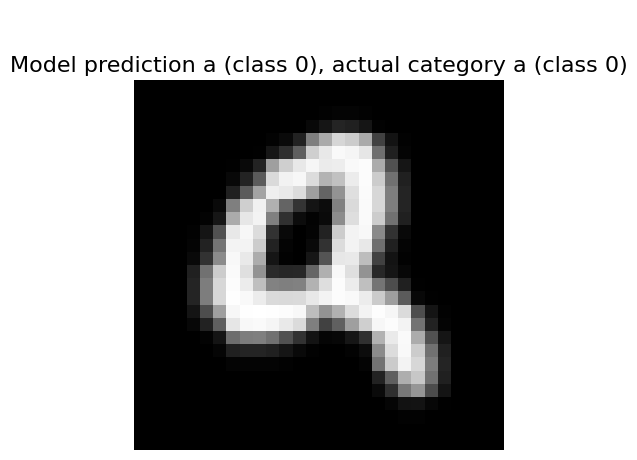

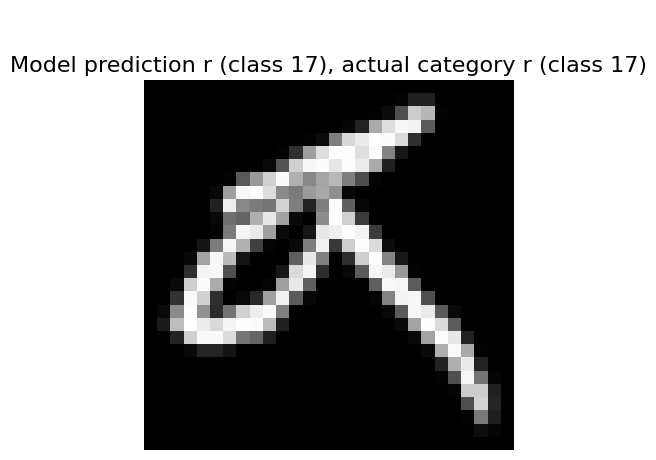

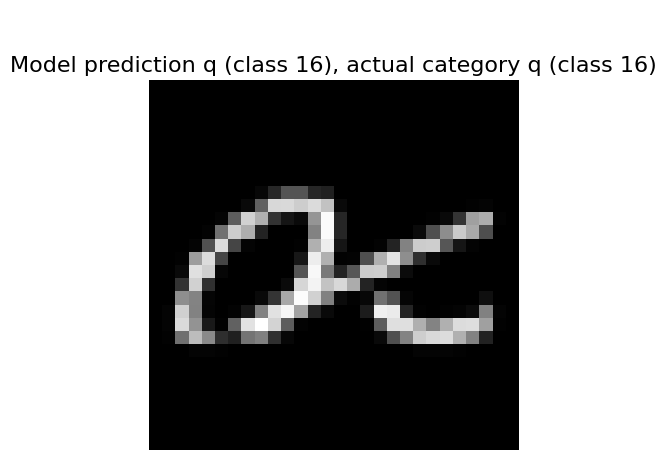

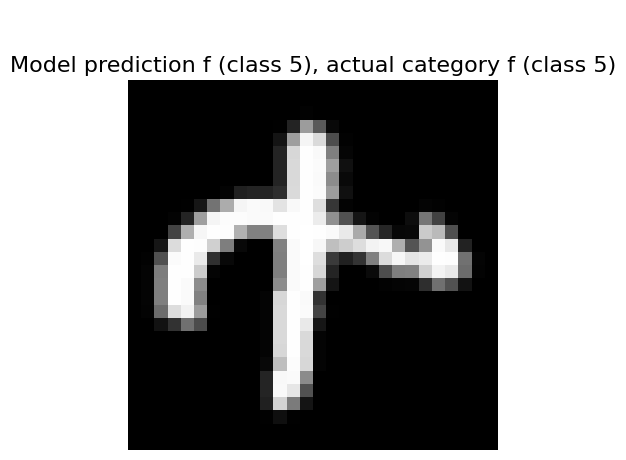

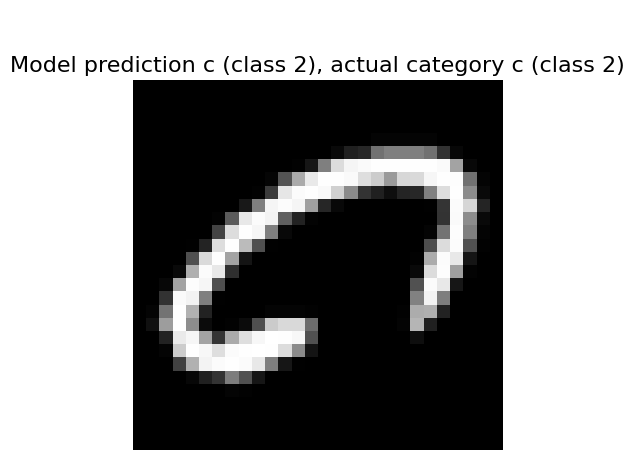

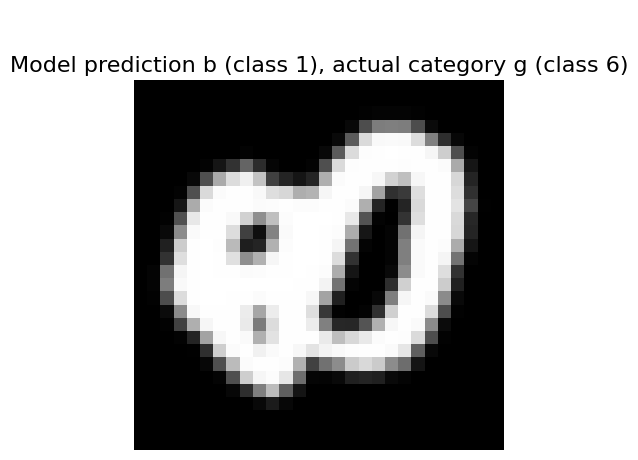

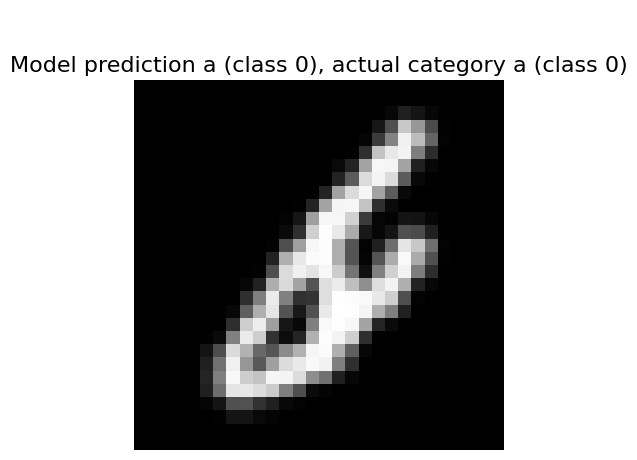

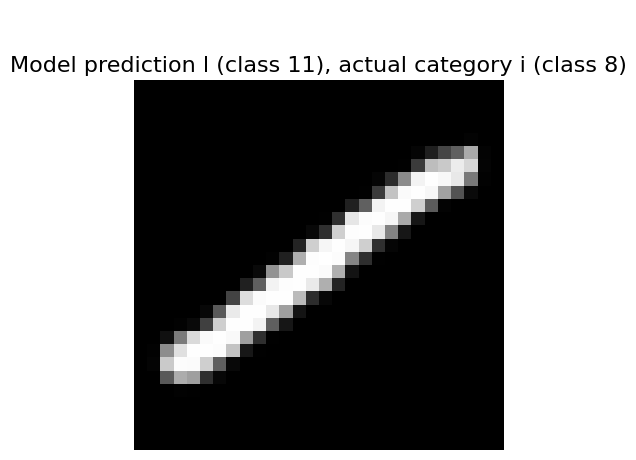

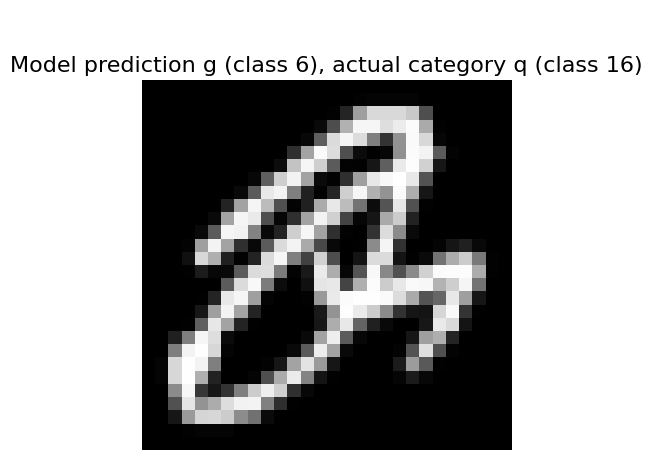

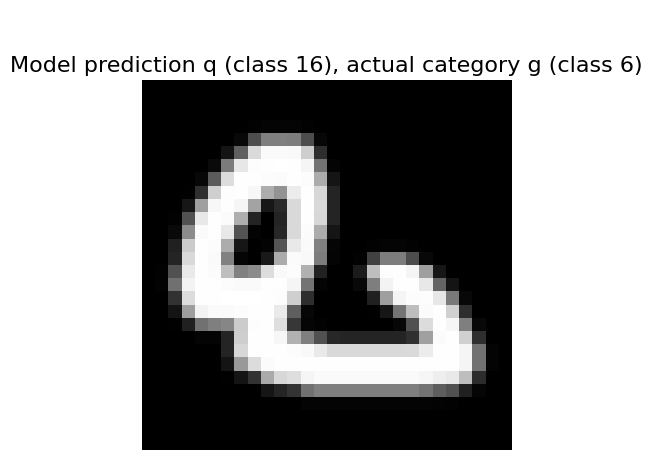

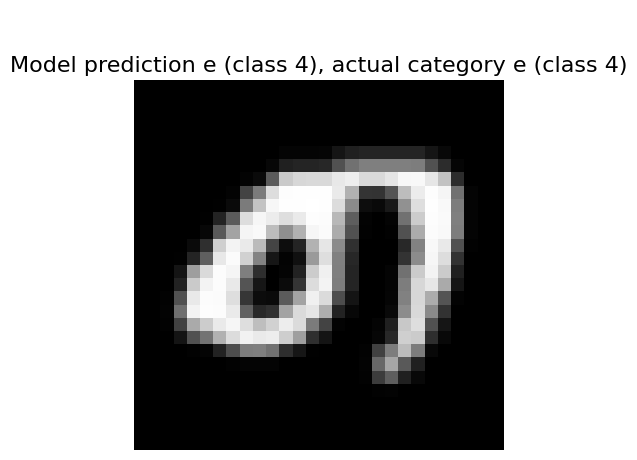

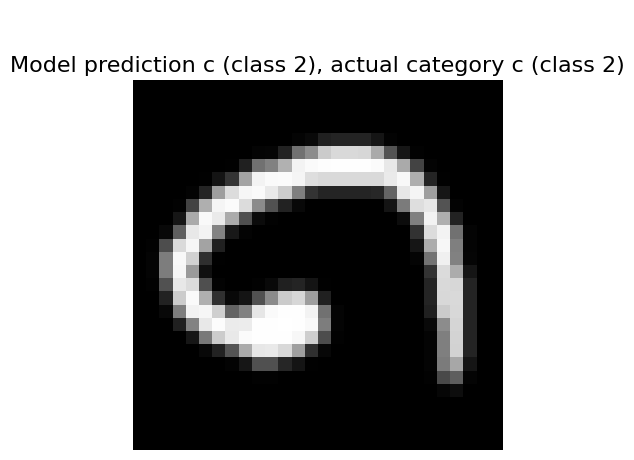

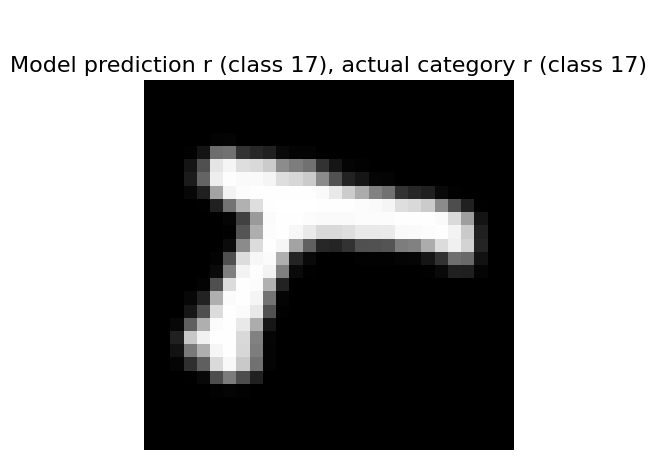

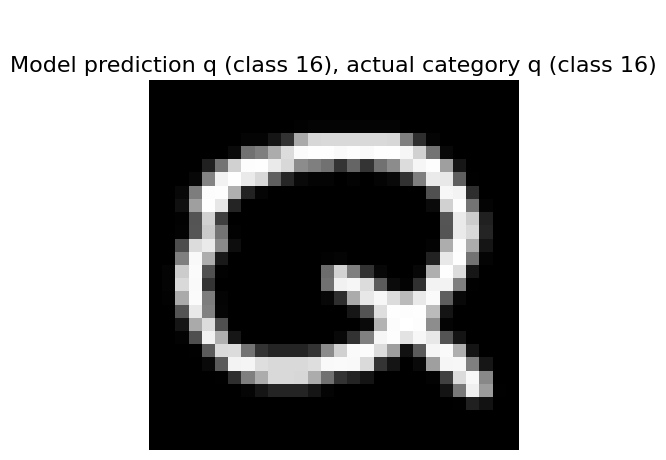

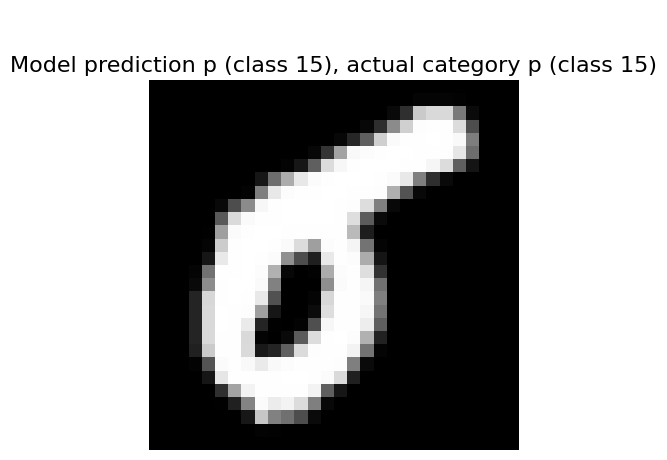

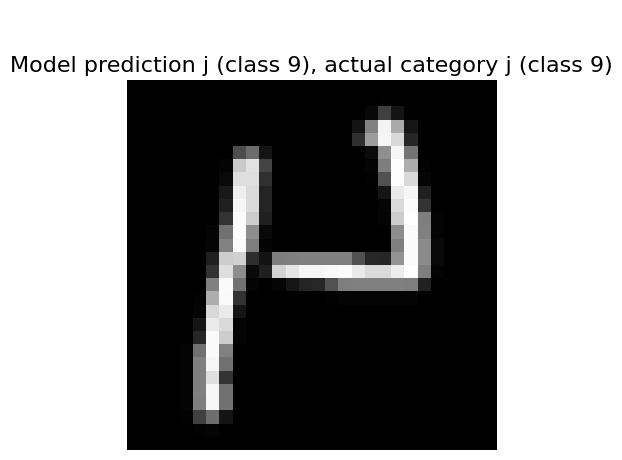

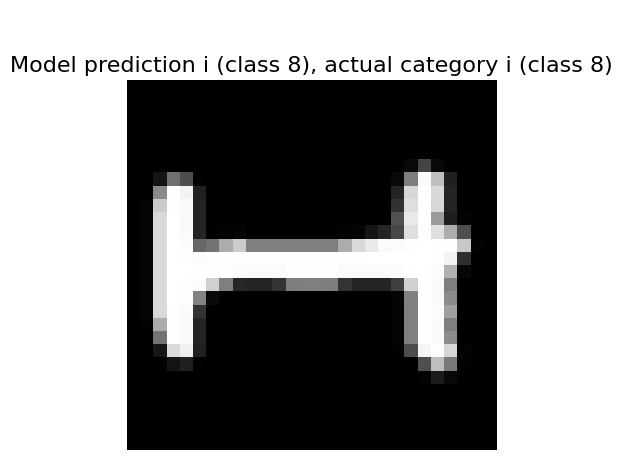

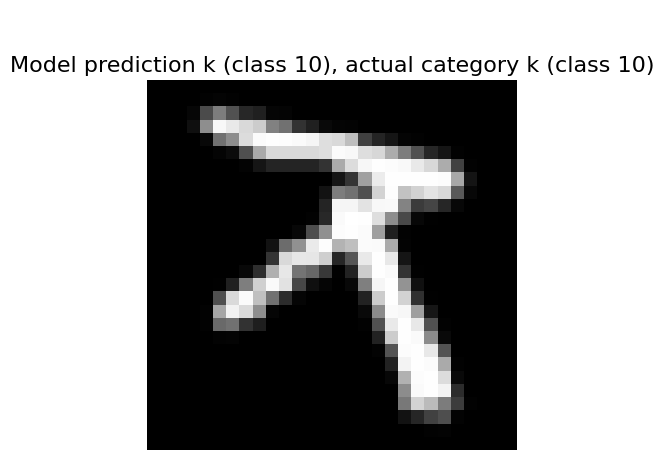

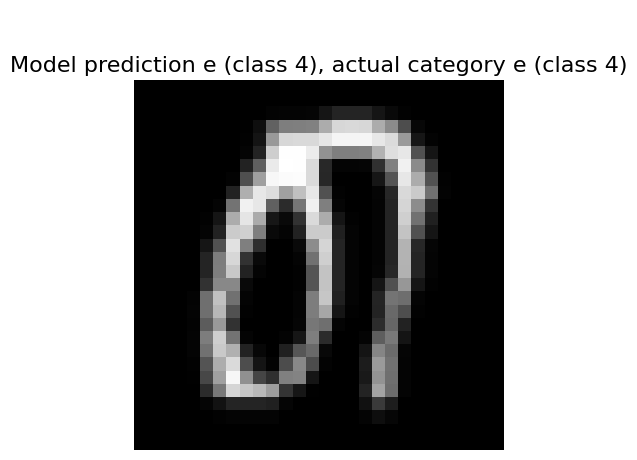

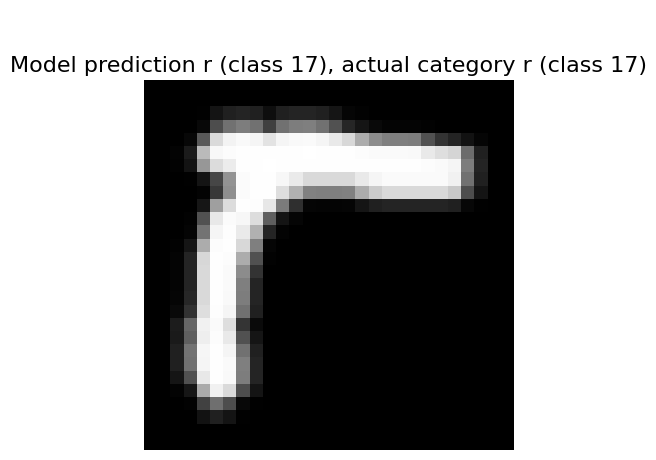

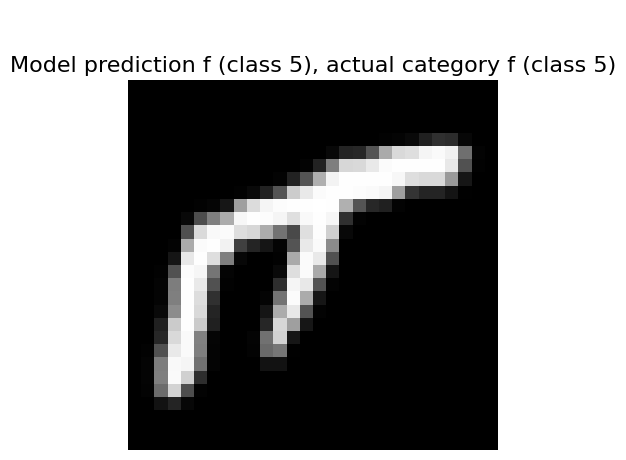

In [ ]:
for i in range(64):
    predicted_class = np.argmax(predictions[i])
    actual_class = test_labels[i].long().item() - 1

    show(i, "Model prediction {} (class {}), actual category {} (class {})".format(
          classes[predicted_class], predicted_class,
          classes[actual_class], actual_class
    ))

Confusion matrix is shown for each classes

Accuracy on test data: 0.847027027027027


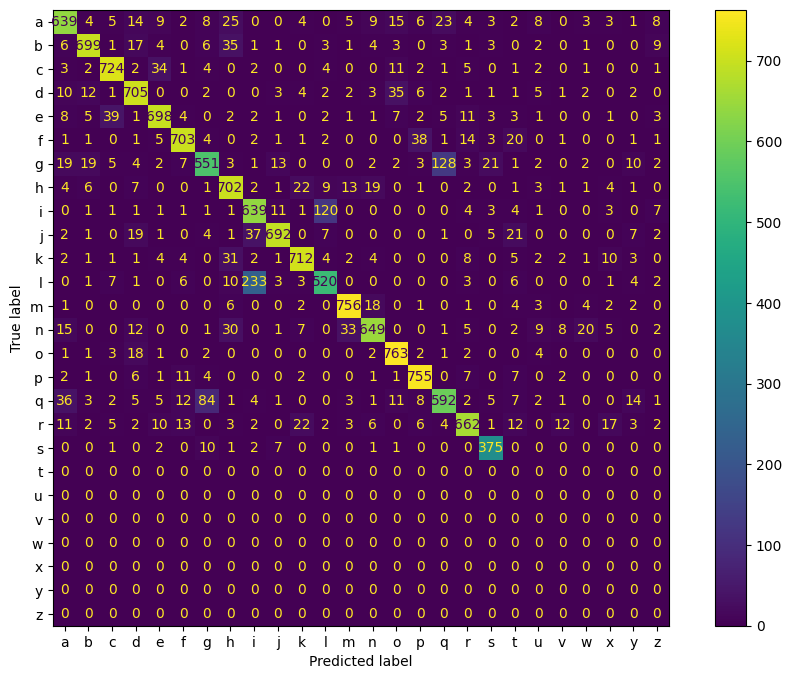

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

y_pred = []
y_true = []

# iterate over test data
for inputs, labels in test_dataloader:
        output = loaded_model.predict(inputs.numpy())

        output = np.argmax(output, axis = 1).astype("float64").tolist()
        y_pred.extend(output)

        labels = [ x-1 for x in labels.tolist()]
        y_true.extend(labels)

acc = accuracy_score(y_true, y_pred)
print("Accuracy on test data:", acc)

# Build confusion matrix
cm = confusion_matrix(y_true, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels = classes)
fig, ax = plt.subplots(figsize = (12, 8))
cmp.plot(ax = ax)

Just checking the test accuracy manually which is same as obtained by trainer.test

In [ ]:
np.trace(cm) / len(test_dataset)

0.847027027027027